## About Dataset
#### Overview:
* This dataset contains records of transactions from a global e-commerce platform. It includes detailed information about each transaction, such as invoice  numbers, item descriptions, quantities, and unit prices. This data can be used for a range of analyses, including customer behavior, product demand, pricing trends, and sales performance across different countries.

#### Columns:
* InvoiceNo: Unique invoice number for each transaction.
* InvoiceDate: Date and time when the transaction was recorded.
* CustomerID: Unique identifier for each customer (some records may lack customer IDs).
* StockCode: Unique code assigned to each product.
* Description: Text description of each product.
* Quantity: Number of units of the product sold in the transaction.
* UnitPrice: Price per unit of the product (in the platform’s currency).
* Country: Country of the customer who placed the order.

#### Dataset Size:

* Number of Rows: 541,909
* Number of Columns: 8

In [1]:
#Used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from category_encoders import BinaryEncoder
from warnings import filterwarnings
filterwarnings ('ignore')
sns.set(rc={'figure.figsize':(13, 5)}, font_scale=1.3)

In [2]:
#reading my dataset
df = pd.read_csv('Dataset_ecommerce.csv')
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#checking for duplicates
df.duplicated().sum()

0

In [5]:
#checking null values
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [6]:
#checking precentege for the null values
#less than 5% drop rows, More than 60% drop column
df.isnull().mean()*100

InvoiceNo       0.000000
InvoiceDate     0.000000
CustomerID     24.926694
StockCode       0.000000
Description     0.000000
Quantity        0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

In [7]:
# renaming table columns
df.columns = df.columns.map(lambda x: x.lower())

In [8]:
#to uderstand the data better
df.describe()

,customerid,quantity,unitprice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [9]:
df.describe(include='O') #object

,invoiceno,invoicedate,stockcode,description,country
count,541909,541909,541909,541909,541909
unique,25900,23260,9000,10,28
top,573585,2011-10-31 14:41:00,SC2014,Sports Equipment,Cote d'Ivoire
freq,1114,1114,96,54765,19651


In [10]:
df

,invoiceno,invoicedate,customerid,stockcode,description,quantity,unitprice,country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [11]:
#number of unique values in the invoicedate column
df.invoicedate.nunique()

23260

In [12]:
#sort unique values and to know the format
sorted(df.invoicedate.unique())

['2010-12-01 08:26:00',
 '2010-12-01 08:28:00',
 '2010-12-01 08:34:00',
 '2010-12-01 08:35:00',
 '2010-12-01 08:45:00',
 '2010-12-01 09:00:00',
 '2010-12-01 09:01:00',
 '2010-12-01 09:02:00',
 '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 '2010-12-01 09:34:00',
 '2010-12-01 09:37:00',
 '2010-12-01 09:41:00',
 '2010-12-01 09:45:00',
 '2010-12-01 09:49:00',
 '2010-12-01 09:53:00',
 '2010-12-01 09:56:00',
 '2010-12-01 09:57:00',
 '2010-12-01 09:58:00',
 '2010-12-01 09:59:00',
 '2010-12-01 10:03:00',
 '2010-12-01 10:19:00',
 '2010-12-01 10:24:00',
 '2010-12-01 10:29:00',
 '2010-12-01 10:37:00',
 '2010-12-01 10:39:00',
 '2010-12-01 10:47:00',
 '2010-12-01 10:51:00',
 '2010-12-01 10:52:00',
 '2010-12-01 10:53:00',
 '2010-12-01 11:21:00',
 '2010-12-01 11:22:00',
 '2010-12-01 11:27:00',
 '2010-12-01 11:29:00',
 '2010-12-01 11:32:00',
 '2010-12-01 11:33:00',
 '2010-12-01 11:34:00',
 '2010-12-01 11:41:00',
 '2010-12-01 11:45:00',
 '2010-12-01 11:49:00',
 '2010-12-01 11:52:00',
 '2010-12-01 11:

In [13]:
# to know data type
df.invoicedate.dtype

dtype('O')

In [14]:
# change data type to datetime 
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [15]:
#checking data type
df.dtypes

invoiceno              object
invoicedate    datetime64[ns]
customerid            float64
stockcode              object
description            object
quantity                int64
unitprice             float64
country                object
dtype: object

In [16]:
#adding month column
df['month'] = df['invoicedate'].dt.month

In [17]:
#adding day name column
df['day_name'] = df['invoicedate'].dt.day_name()

In [18]:
#adding hour column
df['hour'] = df['invoicedate'].dt.hour

In [19]:
#dataframe after updates
df

,invoiceno,invoicedate,customerid,stockcode,description,quantity,unitprice,country,month,day_name,hour
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,12,Wednesday,8
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,12,Wednesday,8
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,12,Wednesday,8
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,12,Wednesday,8
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,12,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,12,Friday,12
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,12,Friday,12
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,12,Friday,12
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,12,Friday,12


In [20]:
#adding season function
def get_season(m):
    if m in [12,1,2]:
        return 'Winter'
    elif m in [3,4,5]:
        return 'Spring'
    elif m in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

In [21]:
#adding season column
df['season'] = df['month'].apply(get_season)

In [22]:
#dataframe after updates
df

,invoiceno,invoicedate,customerid,stockcode,description,quantity,unitprice,country,month,day_name,hour,season
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,12,Wednesday,8,Winter
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,12,Wednesday,8,Winter
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,12,Wednesday,8,Winter
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,12,Wednesday,8,Winter
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,12,Wednesday,8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,12,Friday,12,Winter
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,12,Friday,12,Winter
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,12,Friday,12,Winter
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,12,Friday,12,Winter


In [23]:
#time of the day function
def get_time_of_day(h):
    if h in range(6,13):
        return 'Morning'
    elif h in range(13,19):
        return 'Afternoon'
    elif h in range(19,23):
        return 'Evening'
    else:
        return 'Late Night'

In [24]:
# adding time of the day column
df['time_of_day'] = df.hour.apply(get_time_of_day)

In [25]:
#adding sales column
df['sales'] = df['quantity'] * df['unitprice']

In [26]:
#dataframe after updates
df

,invoiceno,invoicedate,customerid,stockcode,description,quantity,unitprice,country,month,day_name,hour,season,time_of_day,sales
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,12,Wednesday,8,Winter,Morning,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,12,Wednesday,8,Winter,Morning,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,12,Wednesday,8,Winter,Morning,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,12,Wednesday,8,Winter,Morning,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,12,Wednesday,8,Winter,Morning,1941.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,12,Friday,12,Winter,Morning,913.25
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,12,Friday,12,Winter,Morning,8521.10
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,12,Friday,12,Winter,Morning,560.98
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,12,Friday,12,Winter,Morning,3592.35


In [27]:
df.month.value_counts() # nov has the highest traffic all over the 2 years

month
11    84711
12    68006
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='count'>

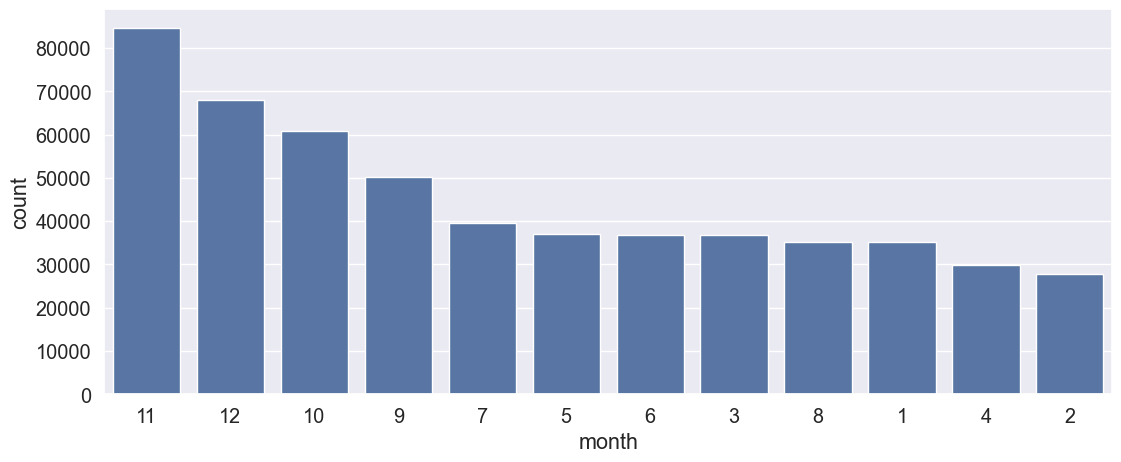

In [28]:
#plotting the highest months in traffic
sns.countplot(x=df.month, order=df.month.value_counts().index)

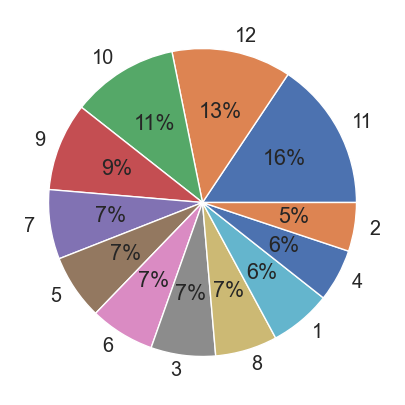

In [29]:
plt.pie(df.month.value_counts(), labels=df.month.value_counts().index, autopct='%1.0f%%')
plt.show()

<Axes: xlabel='day_name', ylabel='count'>

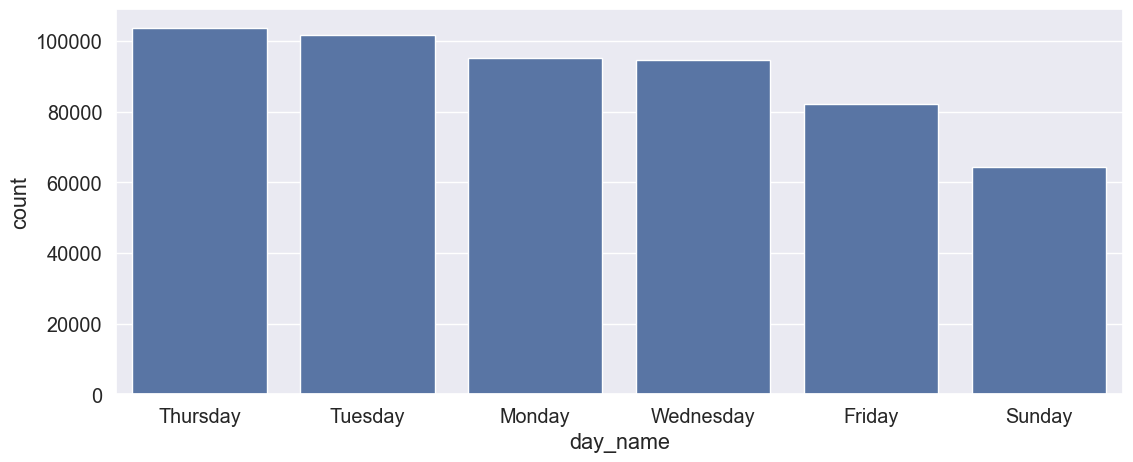

In [30]:
#plotting the highest day name in traffic, they all in the same avg except friday and especially sunday
sns.countplot(x=df.day_name, order=df.day_name.value_counts().index)

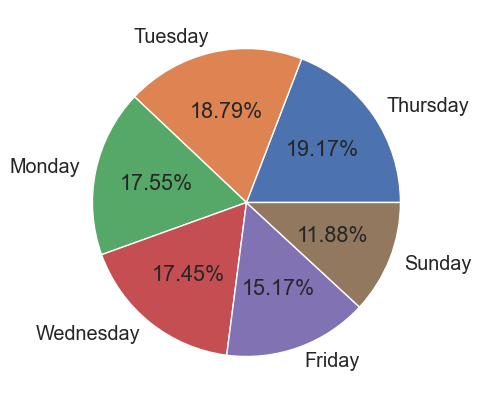

In [31]:
plt.pie(df.day_name.value_counts(), labels=df.day_name.value_counts().index, autopct='%1.2f%%')
plt.show()

<Axes: xlabel='hour', ylabel='count'>

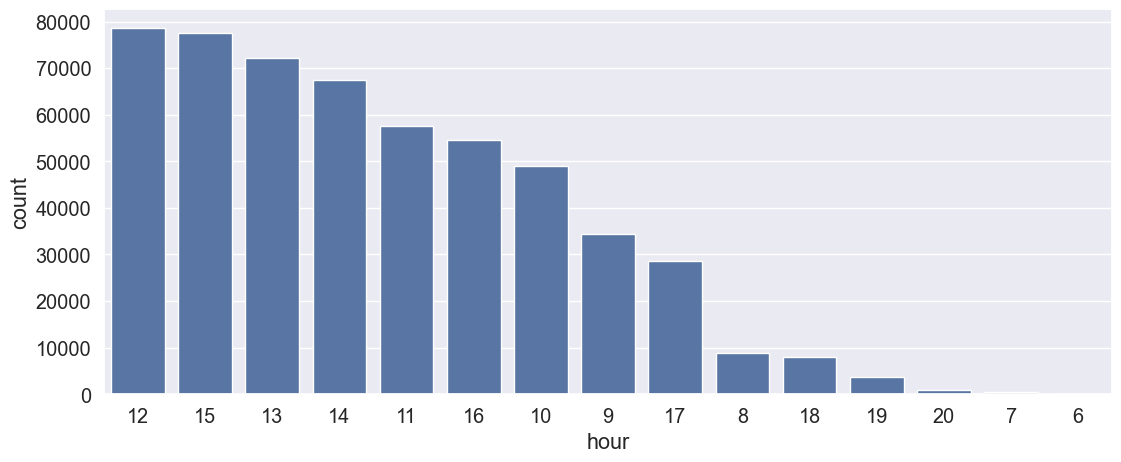

In [32]:
#plotting the highest hour in traffic
sns.countplot(x=df.hour, order=df.hour.value_counts().index)

<Axes: xlabel='hour', ylabel='Count'>

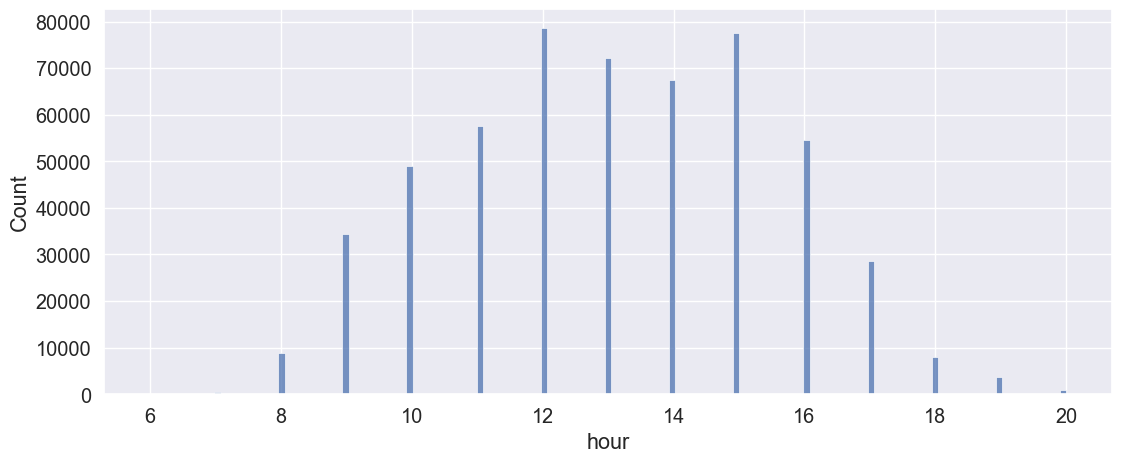

In [33]:
#very early and late hours have low sales, peak of orders at the afternoon  
sns.histplot(x=df.hour)

<Axes: xlabel='season', ylabel='count'>

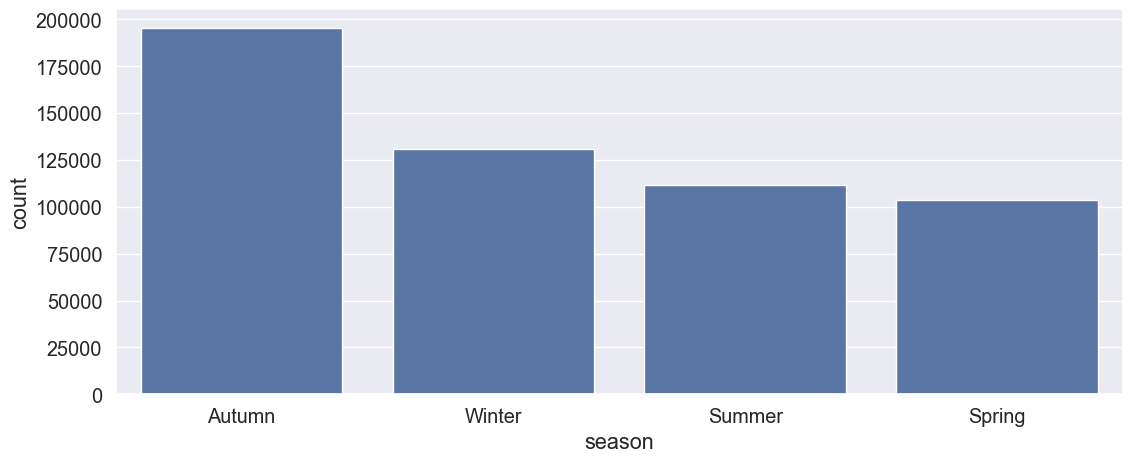

In [34]:
#plotting the highest season in traffic, Autumn has the highest orders while Spring has the lowest
sns.countplot(x=df.season, order=df.season.value_counts().index)

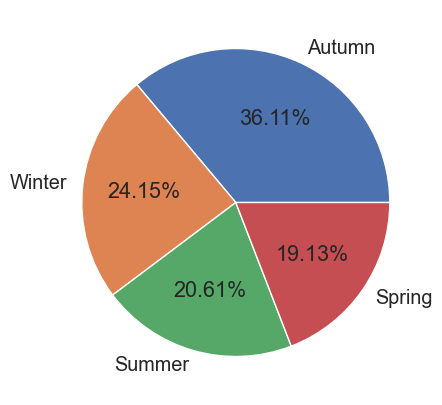

In [35]:
plt.pie(df.season.value_counts(), labels=df.season.value_counts().index, autopct='%1.2f%%')
plt.show()

<Axes: xlabel='time_of_day', ylabel='count'>

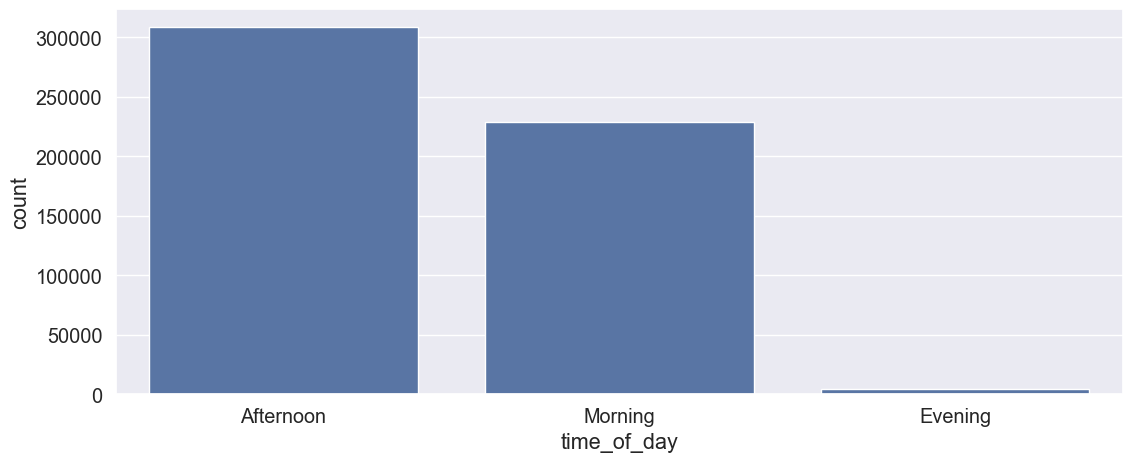

In [36]:
#plotting the highest time of day in traffic, Afternoon has the highest traffic while Evening is very close to be 0 like late night
sns.countplot(x=df.time_of_day, order=df.time_of_day.value_counts().index)

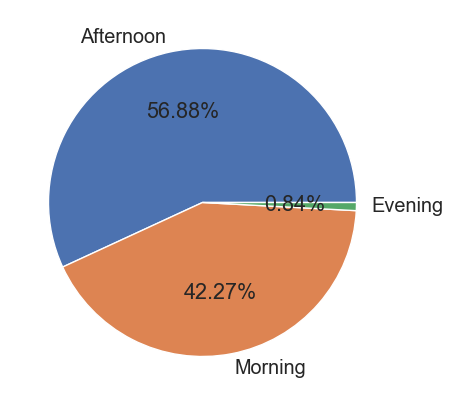

In [37]:
plt.pie(df.time_of_day.value_counts(), labels=df.time_of_day.value_counts().index, autopct='%1.2f%%')
plt.show()

In [38]:
df.sales.describe() # to understand the data

count    541909.000000
mean       2552.274759
std        2210.407501
min           1.000000
25%         725.160000
50%        1922.440000
75%        3886.480000
max        9999.000000
Name: sales, dtype: float64

<Axes: xlabel='sales', ylabel='Count'>

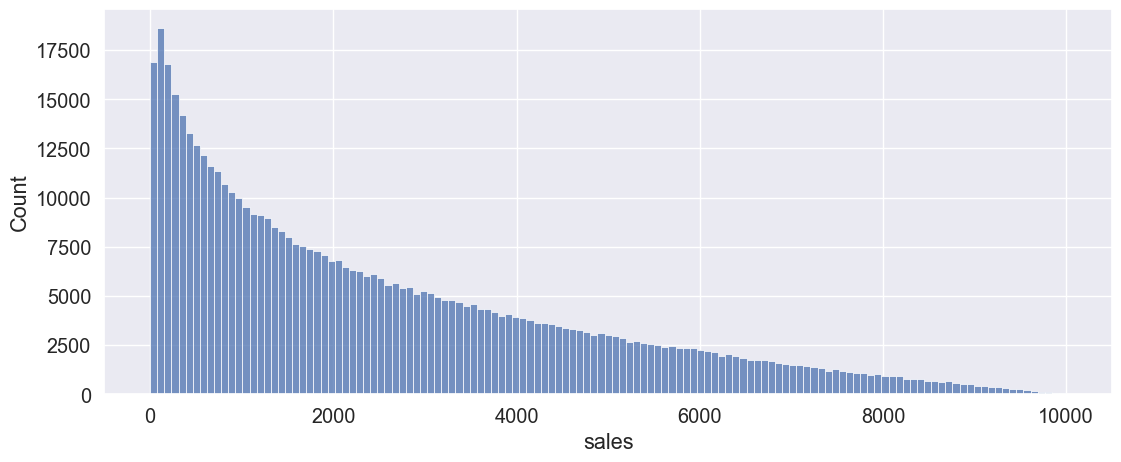

In [39]:
sns.histplot(x=df.sales) # as the sales increase, the count decreases

<Axes: xlabel='sales'>

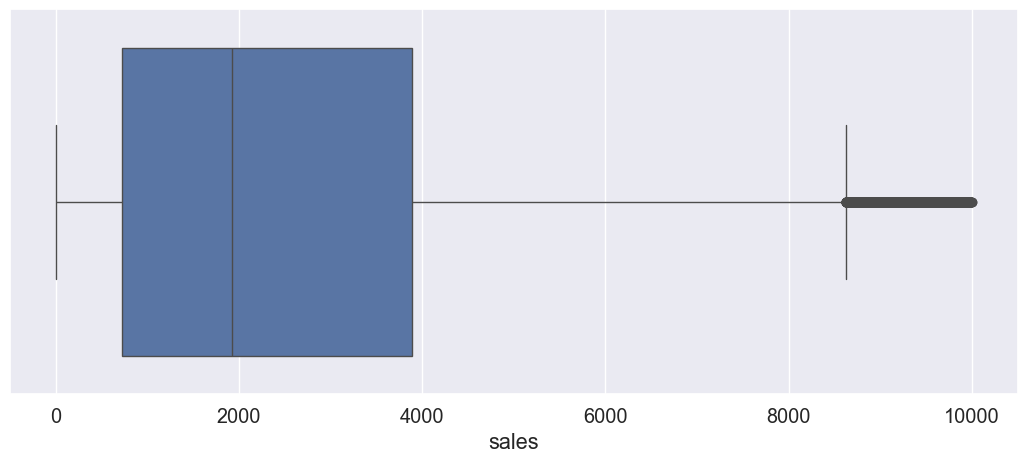

In [40]:
sns.boxplot(x=df.sales) # the most sales is between 700 and 3800

In [41]:
df.description.value_counts() # count of each value in the description column 

description
Sports Equipment    54765
Jewelry             54536
Kitchenware         54453
Furniture           54300
Toys                54166
Shoes               54139
Cloths              54008
Electronics         53939
Cosmetics           53836
Books               53767
Name: count, dtype: int64

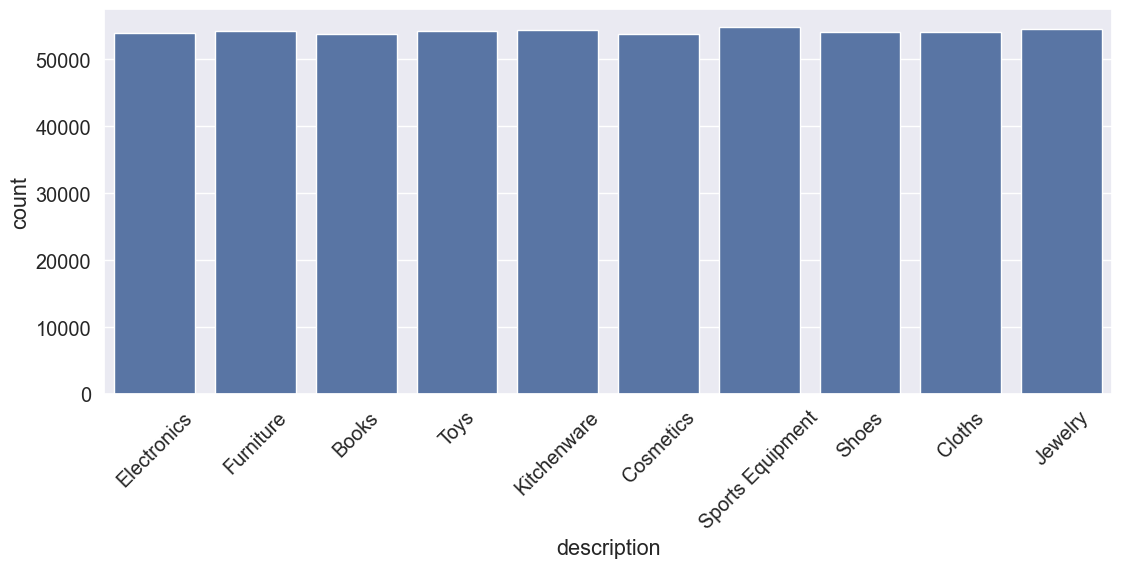

In [42]:
sns.countplot(x=df.description) # they are all seem to be in the same range
plt.xticks(rotation=45) # to rotate the description column data to fit in the countplot diagram
plt.show() # show diagram

In [43]:
df.quantity.describe() # understanding the data 

count    541909.000000
mean         50.534748
std          28.849367
min           1.000000
25%          26.000000
50%          51.000000
75%          76.000000
max         100.000000
Name: quantity, dtype: float64

<Axes: xlabel='quantity'>

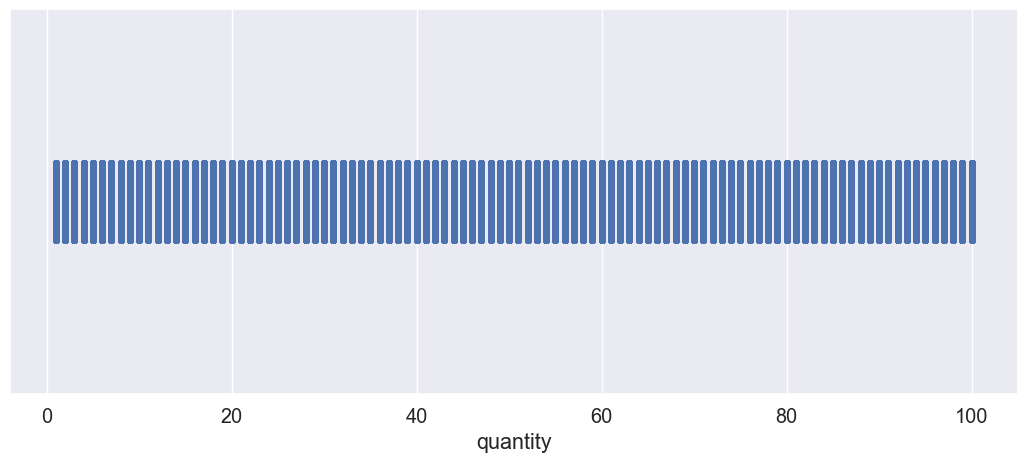

In [44]:
sns.stripplot(x=df.quantity) # Quantity between 1 and 100

<Axes: xlabel='quantity'>

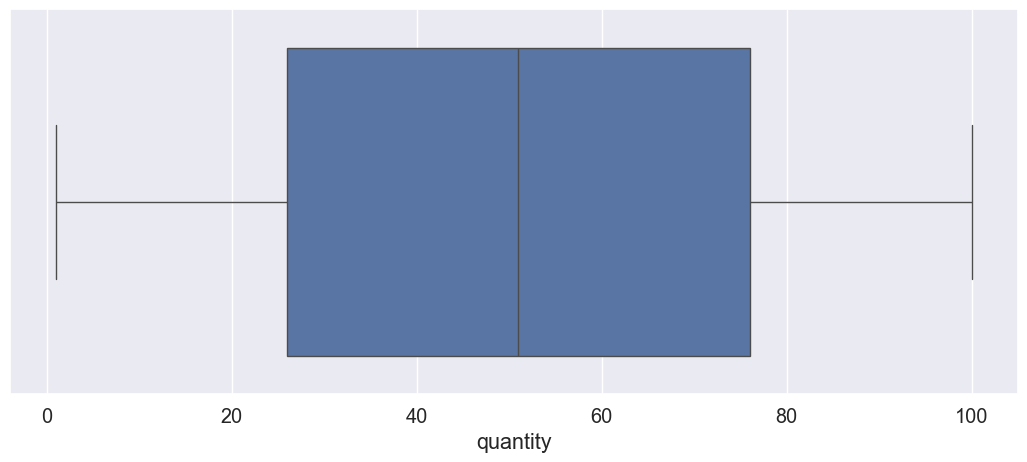

In [45]:
sns.boxplot(x=df.quantity) # the most frequent quantity between 25 and 75

In [46]:
df.unitprice.describe() #understanding unitprice data

count    541909.000000
mean         50.476354
std          28.564775
min           1.000000
25%          25.750000
50%          50.430000
75%          75.180000
max         100.000000
Name: unitprice, dtype: float64

<Axes: xlabel='unitprice'>

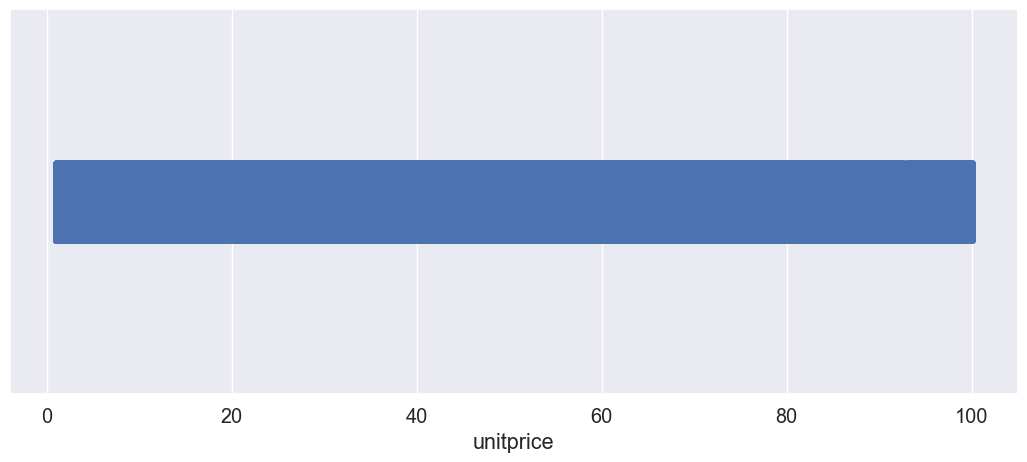

In [47]:
sns.stripplot(x=df.unitprice) #unitprice between 1 and 100 like the quantity

<Axes: xlabel='unitprice'>

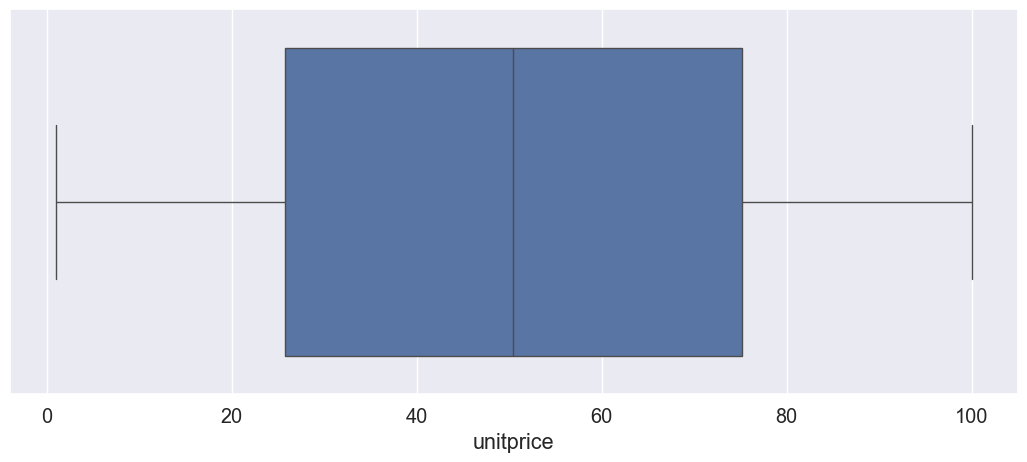

In [48]:
sns.boxplot(x=df.unitprice) #unitprice most frequent between 25 and 75 as the quantity

In [49]:
df.country.nunique() # number of unique values

28

In [50]:
df.country.value_counts() # value count in country column 

country
Cote d'Ivoire    19651
Sierra Leone     19533
Benin            19525
Nigeria          19520
Cameroon         19451
Ethiopia         19427
Mozambique       19424
Rwanda           19416
Togo             19410
Senegal          19402
Zimbabwe         19400
Morocco          19391
Uganda           19370
Libya            19362
Burkina Faso     19355
Ghana            19350
Sudan            19349
Somalia          19349
South Africa     19342
Niger            19312
Tanzania         19300
Kenya            19298
Algeria          19281
Egypt            19210
Zambia           19158
Tunisia          19131
Madagascar       19117
Mali             19075
Name: count, dtype: int64

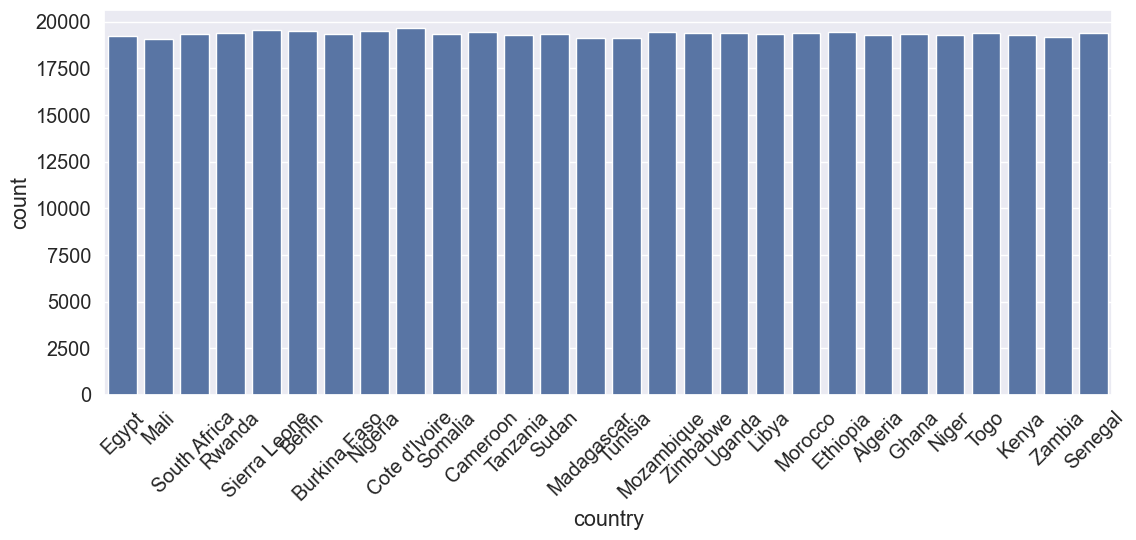

In [51]:
sns.countplot(x=df.country) # they all are in the same range, very close
plt.xticks(rotation=45) # to rotate the description column data to fit in the countplot diagram
plt.show() # show diagram

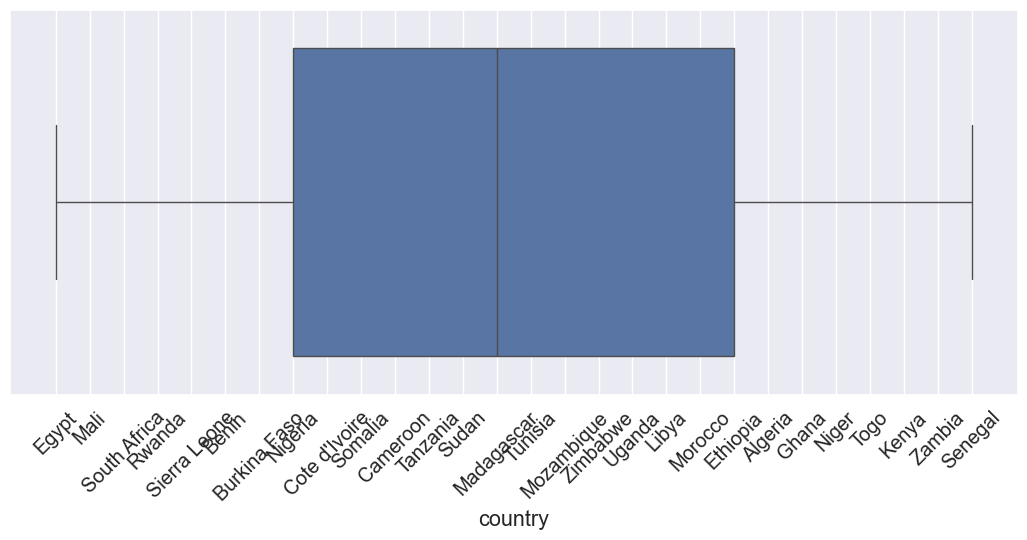

In [52]:
sns.boxplot(x=df.country) # but the most frequent from Burkina Faso to Morocco
plt.xticks(rotation=45) # to rotate the description column data to fit in the countplot diagram
plt.show() # show diagram

## Bivariate

In [53]:
df #before dropping

,invoiceno,invoicedate,customerid,stockcode,description,quantity,unitprice,country,month,day_name,hour,season,time_of_day,sales
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,12,Wednesday,8,Winter,Morning,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,12,Wednesday,8,Winter,Morning,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,12,Wednesday,8,Winter,Morning,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,12,Wednesday,8,Winter,Morning,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,12,Wednesday,8,Winter,Morning,1941.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,12,Friday,12,Winter,Morning,913.25
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,12,Friday,12,Winter,Morning,8521.10
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,12,Friday,12,Winter,Morning,560.98
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,12,Friday,12,Winter,Morning,3592.35


In [54]:
df.drop(['invoicedate', 'month', 'hour'], axis=1, inplace=True) #dropping unneeded columns

In [55]:
df #after dropping

,invoiceno,customerid,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales
0,536365,17850.0,SC1734,Electronics,65,10.23,Egypt,Wednesday,Winter,Morning,664.95
1,536365,17850.0,SC2088,Furniture,95,19.61,Mali,Wednesday,Winter,Morning,1862.95
2,536365,17850.0,SC3463,Books,78,61.49,Mali,Wednesday,Winter,Morning,4796.22
3,536365,17850.0,SC6228,Toys,15,24.73,South Africa,Wednesday,Winter,Morning,370.95
4,536365,17850.0,SC2149,Toys,50,38.83,Rwanda,Wednesday,Winter,Morning,1941.50
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,12680.0,SC5440,Furniture,25,36.53,Mozambique,Friday,Winter,Morning,913.25
541905,581587,12680.0,SC3576,Cloths,94,90.65,Tunisia,Friday,Winter,Morning,8521.10
541906,581587,12680.0,SC5283,Furniture,14,40.07,Somalia,Friday,Winter,Morning,560.98
541907,581587,12680.0,SC1099,Cosmetics,45,79.83,Senegal,Friday,Winter,Morning,3592.35


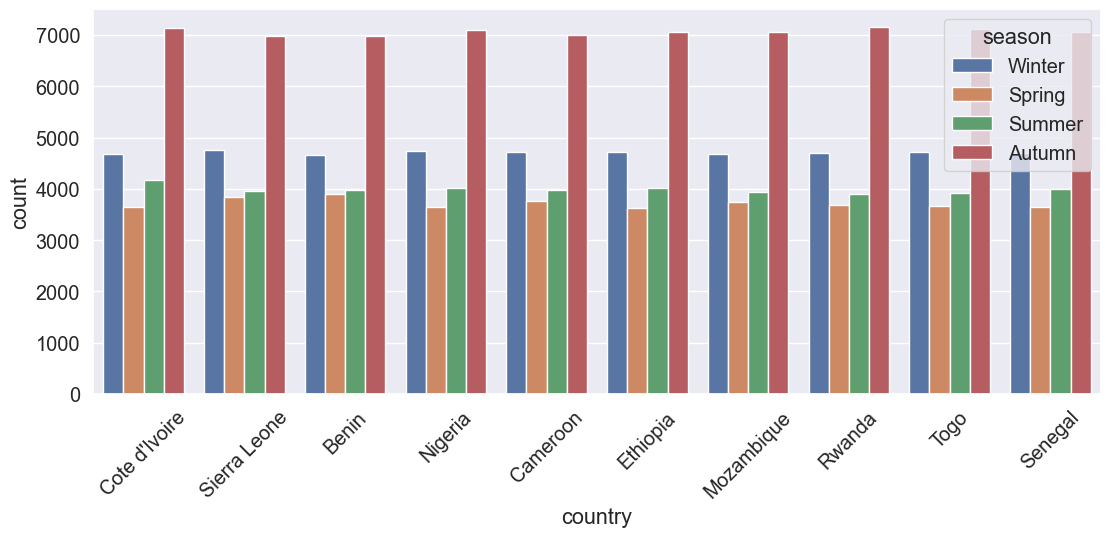

In [56]:
sns.countplot(x=df.country, order=df.country.value_counts().head(10).index, hue=df.season) #top 10 countries most frequent orders in which season
plt.xticks(rotation=45) #rotate the country data to fit in the diagram in a decent way
plt.show() # show data

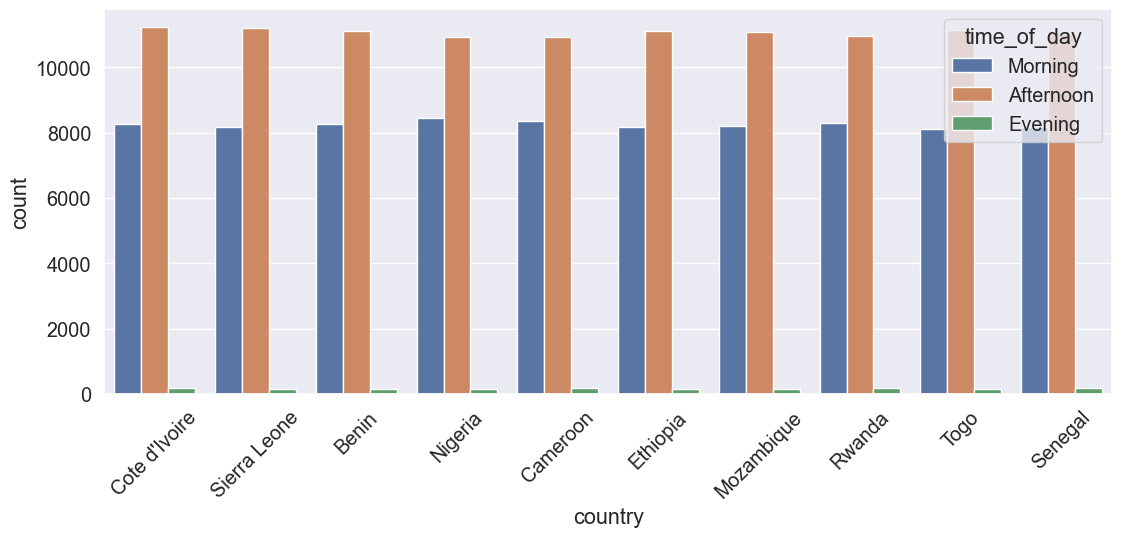

In [57]:
sns.countplot(x=df.country, order=df.country.value_counts().head(10).index, hue=df.time_of_day) #top 10 countries most frequent orders in which time of the day
plt.xticks(rotation=45) #rotate the country data to fit in the diagram in a decent way
plt.show() # show data

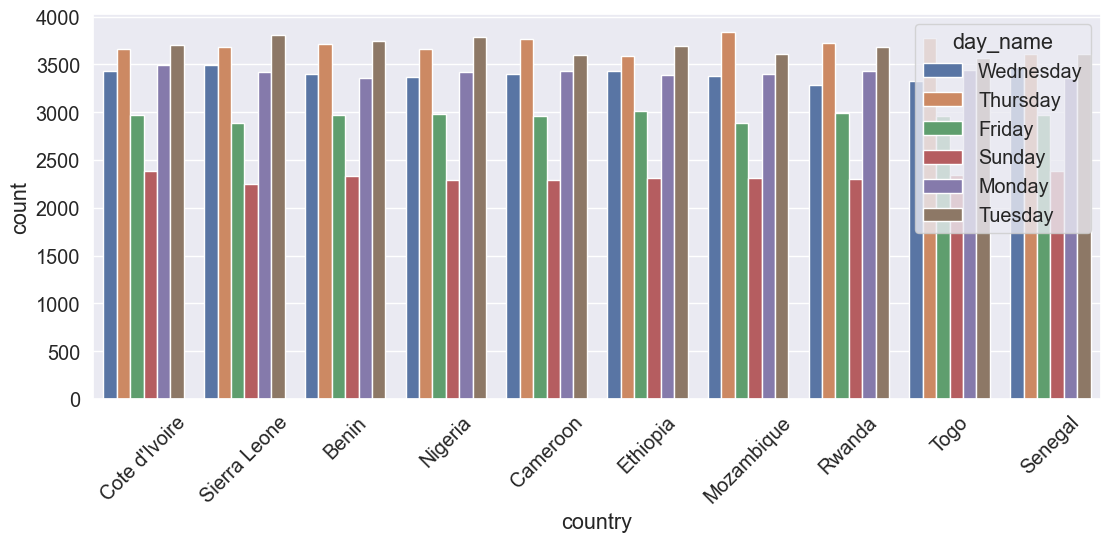

In [58]:
sns.countplot(x=df.country, order=df.country.value_counts().head(10).index, hue=df.day_name) #top 10 countries most frequent orders in which day
plt.xticks(rotation=45) #rotate the country data to fit in the diagram in a decent way
plt.show() # show data

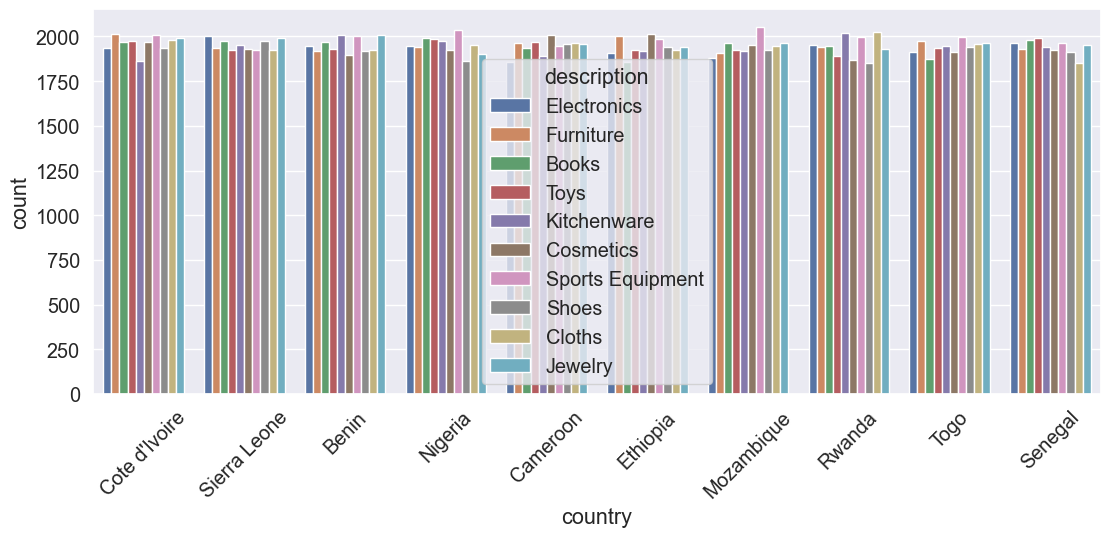

In [59]:
sns.countplot(x=df.country, order=df.country.value_counts().head(10).index, hue=df.description) #top 10 countries most frequent orders in which description type
plt.xticks(rotation=45) #rotate the country data to fit in the diagram in a decent way
plt.show() # show data

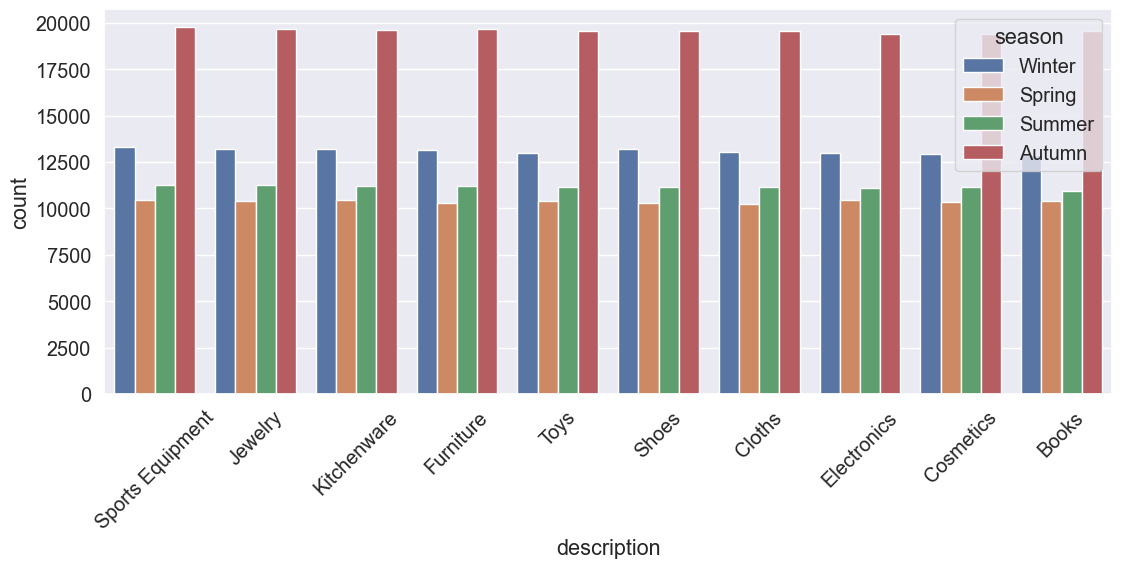

In [60]:
sns.countplot(x=df.description, order=df.description.value_counts().head(10).index, hue=df.season) #top 10 description types that are most frequent in which season
plt.xticks(rotation=45) #rotate the country data to fit in the diagram in a decent way
plt.show() # show data

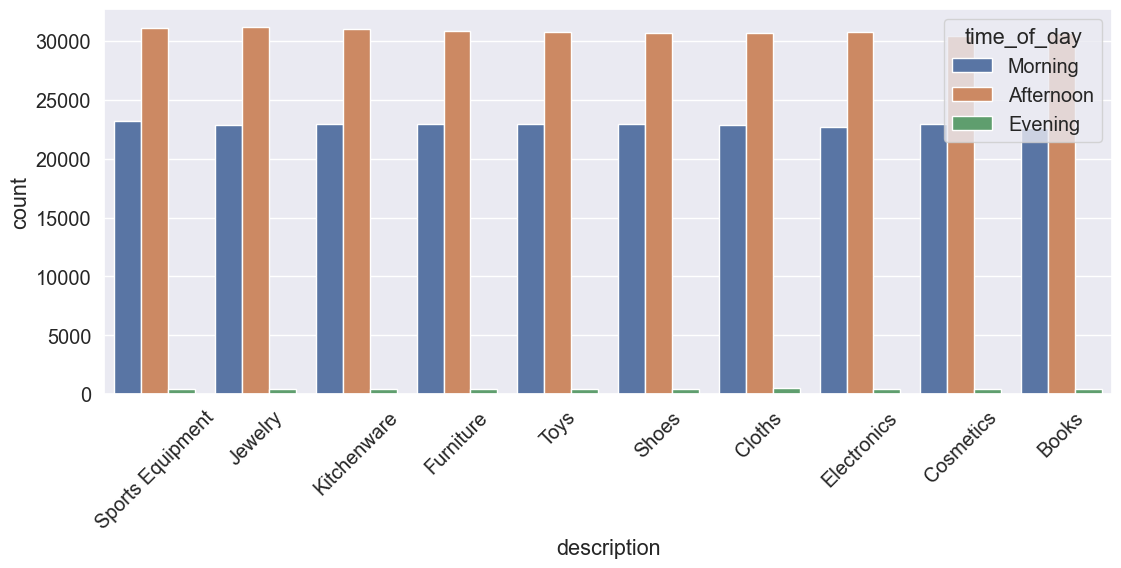

In [61]:
sns.countplot(x=df.description, order=df.description.value_counts().head(10).index, hue=df.time_of_day) #top 10 description types that are most frequent in which time of day
plt.xticks(rotation=45) #rotate the country data to fit in the diagram in a decent way
plt.show() # show data

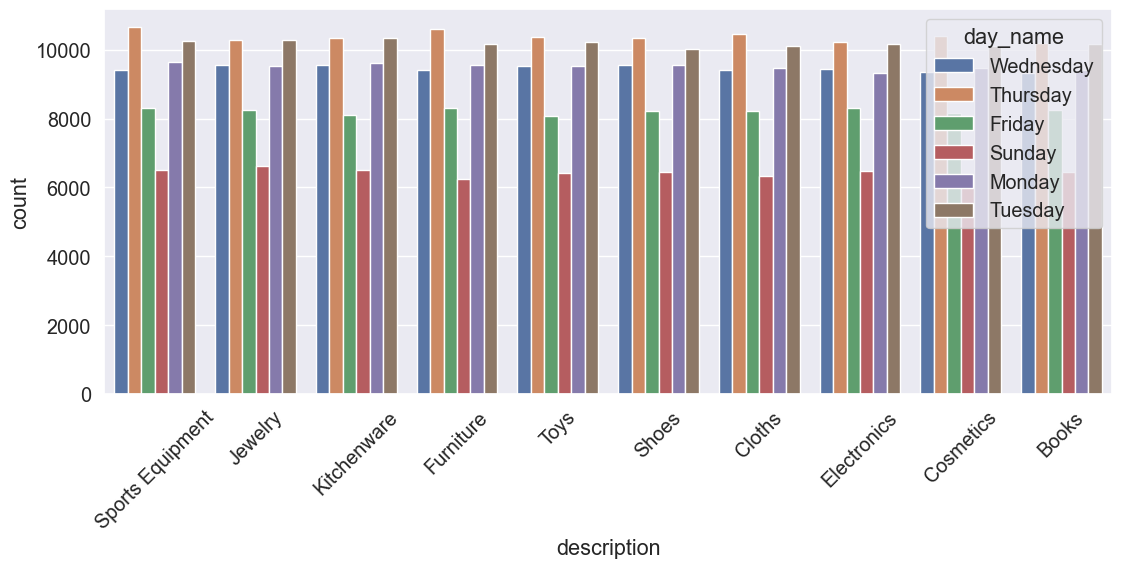

In [62]:
sns.countplot(x=df.description, order=df.description.value_counts().head(10).index, hue=df.day_name) #top 10 description types that are most frequent in which day name
plt.xticks(rotation=45) #rotate the country data to fit in the diagram in a decent way
plt.show() # show data

<Axes: xlabel='quantity', ylabel='country'>

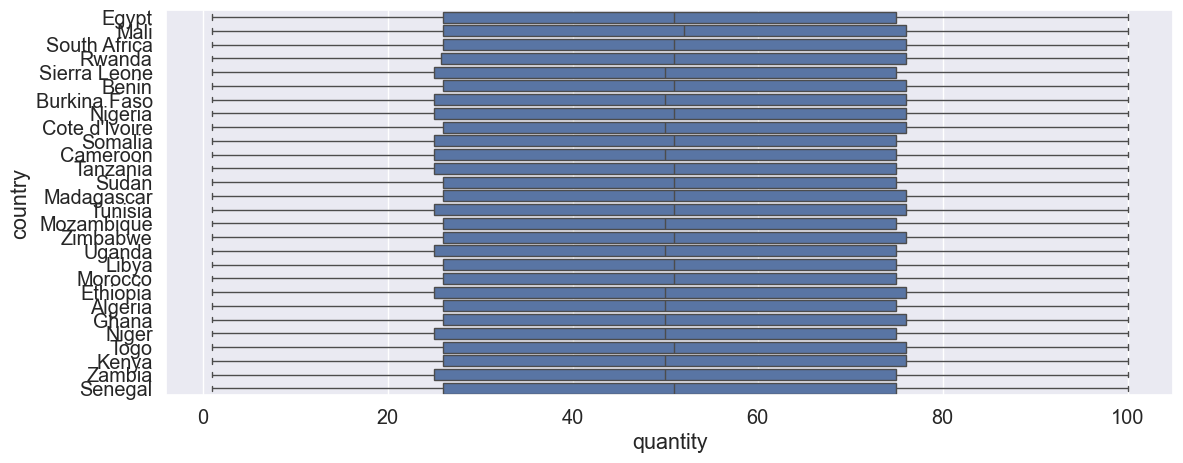

In [63]:
sns.boxplot(x=df.quantity, y=df.country) #countries with respect to quantity

<Axes: xlabel='sales', ylabel='country'>

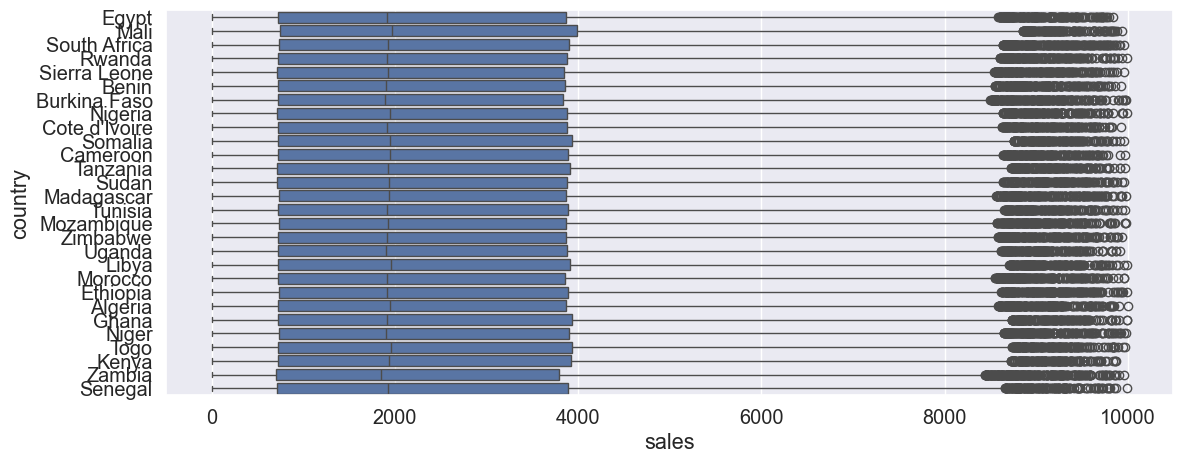

In [64]:
sns.boxplot(x=df.sales, y=df.country) #sales with respect to countries

<Axes: xlabel='sales', ylabel='season'>

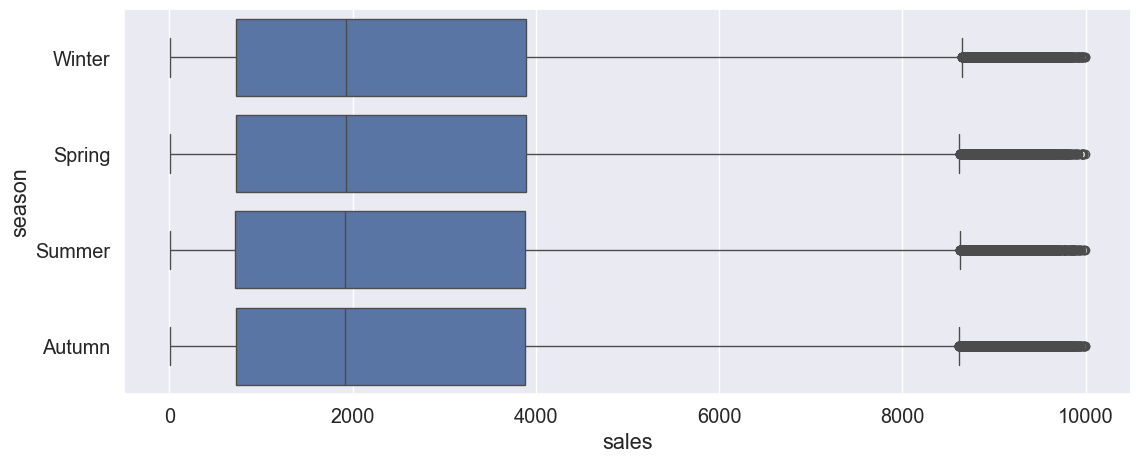

In [65]:
sns.boxplot(x=df.sales, y=df.season) #sales with respect to season

<Axes: xlabel='time_of_day', ylabel='sales'>

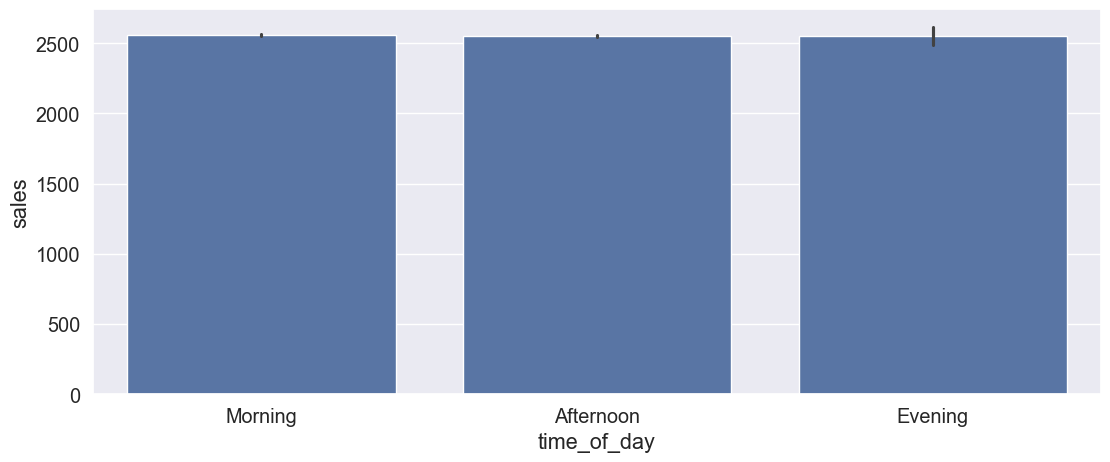

In [66]:
sns.barplot(x=df.time_of_day, y=df.sales) #sales with respect to time of day

<Axes: xlabel='sales', ylabel='day_name'>

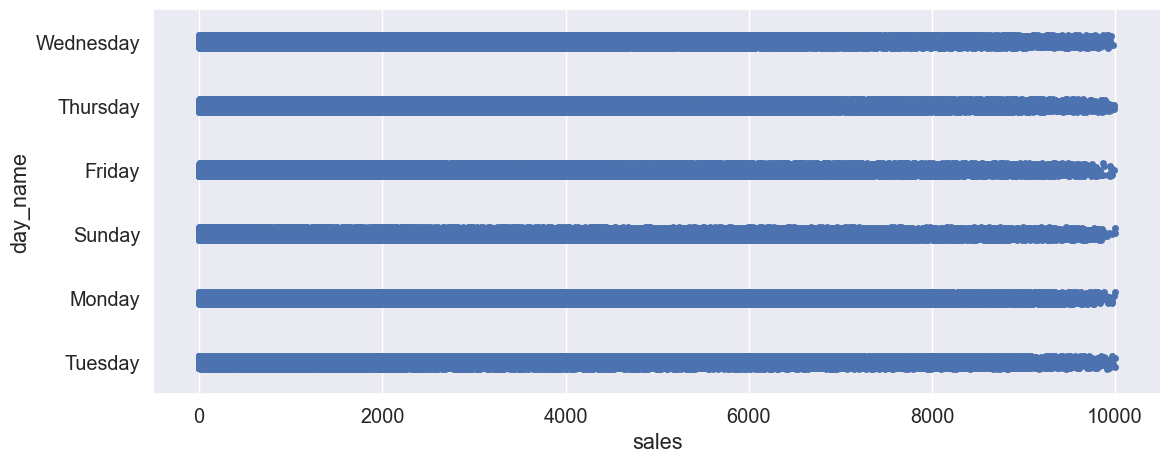

In [67]:
sns.stripplot(x=df.sales, y=df.day_name) #sales with respect to day name

<Axes: xlabel='sales', ylabel='description'>

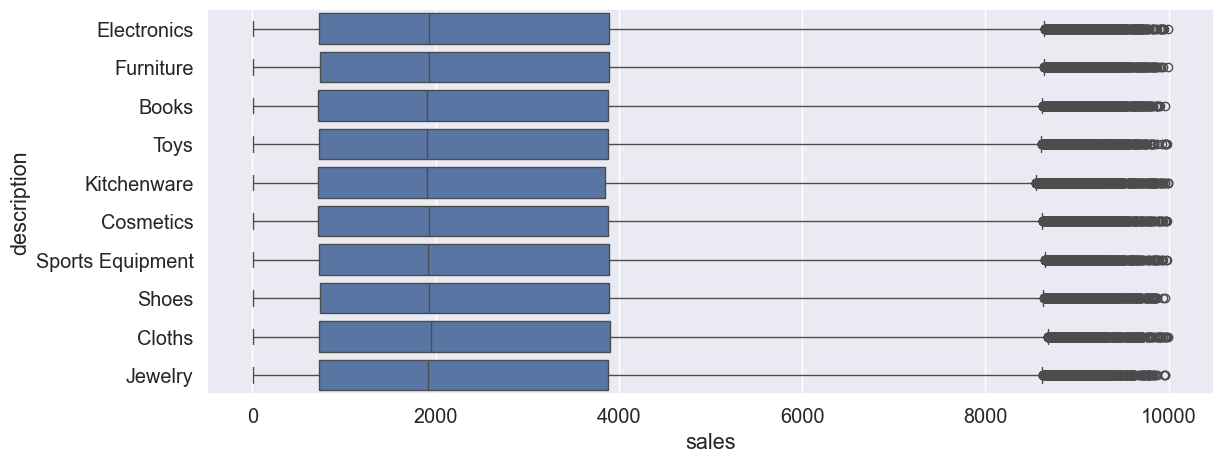

In [68]:
sns.boxplot(x=df.sales, y=df.description) #sales with respect to description

<Axes: xlabel='unitprice', ylabel='description'>

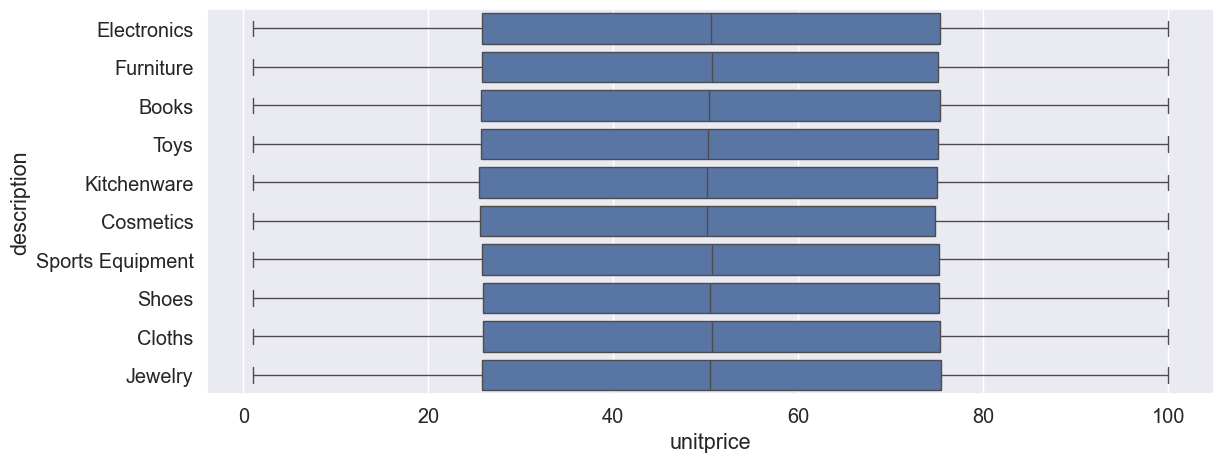

In [69]:
sns.boxplot(x=df.unitprice, y=df.description) #unit price with respect to description

## Questions
  * What is the distribution of sales?
  * What are the most common sales values?
  * Which product categories are most frequently purchased?
  * What is the distribution of product quantities sold per transaction?
  * What percentage of customers make repeat purchases?
  * What is the frequency distribution of transaction counts per customer?
  * What are the busiest months for transactions?
  * Which day of the week sees the highest number of orders?
  * Which countries or regions have the highest transaction counts?
  * What are the most frequently used payment methods?

In [ ]:
#Q1 What is the distribution of sales?
sns.histplot(x=df.sales) # as the sales increase, the count decreases

In [ ]:
#Q2 What are the most common sales values?
sns.boxplot(x=df.sales) # the most sales is between 700 and 3800

In [ ]:
#Q3 What is the total sales revenue in the dataset?
df['sales'].sum()

In [ ]:
#Q4 Which product categories are most frequently purchased?
df.description.value_counts().idxmax()

In [ ]:
#Q5 What is the average order value?
df['sales'].mean()

In [ ]:
#Q6 Which country has the highest number of transactions?
df.country.value_counts().idxmax()

In [ ]:
#Q7 What are the busiest months for sales?
df.groupby('month')['sales'].sum().sort_values(ascending=False)

In [ ]:
#Q8 Which day of the week sees the highest number of orders?
df.day_name.value_counts().idxmax()

In [ ]:
#Q9 Which countries or regions have the highest transaction counts?
df.country.value_counts().idxmax()

In [ ]:
#Q10 What is the distribution of sales revenue by country?
df.groupby('country')['sales'].sum().sort_values(ascending=False)

## Preprocessing

In [70]:
df.duplicated().sum() # checking for duplicates

0

In [71]:
df.isnull().sum() #calc null values

invoiceno           0
customerid     135080
stockcode           0
description         0
quantity            0
unitprice           0
country             0
day_name            0
season              0
time_of_day         0
sales               0
dtype: int64

In [72]:
round(df.isnull().mean()*100, 1) # precentage of the null values

invoiceno       0.0
customerid     24.9
stockcode       0.0
description     0.0
quantity        0.0
unitprice       0.0
country         0.0
day_name        0.0
season          0.0
time_of_day     0.0
sales           0.0
dtype: float64

In [73]:
df.customerid.isnull().sum() #null values in customer id

135080

In [74]:
imputer = KNNImputer(n_neighbors=3) #using knnimputer to fill the null values with it's nearest and most frequent values, n_neighbors --> adjusting neighbors as needed

In [75]:
# selecting types to make it easier to fill
num_df = df.select_dtypes(include='number')
cat_df = df.select_dtypes(include='O')

In [ ]:
transformed = imputer.fit_transform(num_df) # learn and put the data 
transformed

array([[1.78500e+04, 6.50000e+01, 1.02300e+01, 6.64950e+02],
       [1.78500e+04, 9.50000e+01, 1.96100e+01, 1.86295e+03],
       [1.78500e+04, 7.80000e+01, 6.14900e+01, 4.79622e+03],
       ...,
       [1.26800e+04, 1.40000e+01, 4.00700e+01, 5.60980e+02],
       [1.26800e+04, 4.50000e+01, 7.98300e+01, 3.59235e+03],
       [1.26800e+04, 6.00000e+00, 4.66200e+01, 2.79720e+02]])

In [78]:
transformed_df = pd.DataFrame(transformed, columns=num_df.columns) # put it in a data frame
transformed_df

,customerid,quantity,unitprice,sales
0,17850.0,65.0,10.23,664.95
1,17850.0,95.0,19.61,1862.95
2,17850.0,78.0,61.49,4796.22
3,17850.0,15.0,24.73,370.95
4,17850.0,50.0,38.83,1941.50
...,...,...,...,...
541904,12680.0,25.0,36.53,913.25
541905,12680.0,94.0,90.65,8521.10
541906,12680.0,14.0,40.07,560.98
541907,12680.0,45.0,79.83,3592.35


In [79]:
transformed_df[transformed_df.columns[0]] # to help me in concatenation, selecting the first column only (customerid)

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: customerid, Length: 541909, dtype: float64

In [80]:
df[[col for col in df.columns if col != 'customerid']] # to help me in concatenation, selecting all except customerid

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales
0,536365,SC1734,Electronics,65,10.23,Egypt,Wednesday,Winter,Morning,664.95
1,536365,SC2088,Furniture,95,19.61,Mali,Wednesday,Winter,Morning,1862.95
2,536365,SC3463,Books,78,61.49,Mali,Wednesday,Winter,Morning,4796.22
3,536365,SC6228,Toys,15,24.73,South Africa,Wednesday,Winter,Morning,370.95
4,536365,SC2149,Toys,50,38.83,Rwanda,Wednesday,Winter,Morning,1941.50
...,...,...,...,...,...,...,...,...,...,...
541904,581587,SC5440,Furniture,25,36.53,Mozambique,Friday,Winter,Morning,913.25
541905,581587,SC3576,Cloths,94,90.65,Tunisia,Friday,Winter,Morning,8521.10
541906,581587,SC5283,Furniture,14,40.07,Somalia,Friday,Winter,Morning,560.98
541907,581587,SC1099,Cosmetics,45,79.83,Senegal,Friday,Winter,Morning,3592.35


In [81]:
dff = pd.concat([df[[col for col in df.columns if col != 'customerid']], transformed_df[transformed_df.columns[0]]], axis=1) #concat customerid with the original table
dff

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales,customerid
0,536365,SC1734,Electronics,65,10.23,Egypt,Wednesday,Winter,Morning,664.95,17850.0
1,536365,SC2088,Furniture,95,19.61,Mali,Wednesday,Winter,Morning,1862.95,17850.0
2,536365,SC3463,Books,78,61.49,Mali,Wednesday,Winter,Morning,4796.22,17850.0
3,536365,SC6228,Toys,15,24.73,South Africa,Wednesday,Winter,Morning,370.95,17850.0
4,536365,SC2149,Toys,50,38.83,Rwanda,Wednesday,Winter,Morning,1941.50,17850.0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,SC5440,Furniture,25,36.53,Mozambique,Friday,Winter,Morning,913.25,12680.0
541905,581587,SC3576,Cloths,94,90.65,Tunisia,Friday,Winter,Morning,8521.10,12680.0
541906,581587,SC5283,Furniture,14,40.07,Somalia,Friday,Winter,Morning,560.98,12680.0
541907,581587,SC1099,Cosmetics,45,79.83,Senegal,Friday,Winter,Morning,3592.35,12680.0


In [82]:
dff.customerid.isnull().sum() #checking if we did it right

0

In [83]:
dff.customerid = dff.customerid.astype(int) #change the data type to fit the customerid type

In [84]:
dff.customerid.value_counts() #checking data

customerid
17841    7986
14911    5954
14096    5157
12748    4647
14606    2819
         ... 
12760       1
17959       1
12675       1
17851       1
12926       1
Name: count, Length: 5799, dtype: int64

In [85]:
df.customerid.isnull().sum()

135080

In [86]:
df.customerid = dff.customerid

In [87]:
df.customerid.isnull().sum() #fill null values done

0

In [88]:
df.isnull().sum()

invoiceno      0
customerid     0
stockcode      0
description    0
quantity       0
unitprice      0
country        0
day_name       0
season         0
time_of_day    0
sales          0
dtype: int64

In [89]:
df

,invoiceno,customerid,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales
0,536365,17850,SC1734,Electronics,65,10.23,Egypt,Wednesday,Winter,Morning,664.95
1,536365,17850,SC2088,Furniture,95,19.61,Mali,Wednesday,Winter,Morning,1862.95
2,536365,17850,SC3463,Books,78,61.49,Mali,Wednesday,Winter,Morning,4796.22
3,536365,17850,SC6228,Toys,15,24.73,South Africa,Wednesday,Winter,Morning,370.95
4,536365,17850,SC2149,Toys,50,38.83,Rwanda,Wednesday,Winter,Morning,1941.50
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,12680,SC5440,Furniture,25,36.53,Mozambique,Friday,Winter,Morning,913.25
541905,581587,12680,SC3576,Cloths,94,90.65,Tunisia,Friday,Winter,Morning,8521.10
541906,581587,12680,SC5283,Furniture,14,40.07,Somalia,Friday,Winter,Morning,560.98
541907,581587,12680,SC1099,Cosmetics,45,79.83,Senegal,Friday,Winter,Morning,3592.35


In [91]:
x = df.drop('customerid', axis=1) # x = all table except customer id
y = df['customerid'] # y = customerid only

In [92]:
x

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales
0,536365,SC1734,Electronics,65,10.23,Egypt,Wednesday,Winter,Morning,664.95
1,536365,SC2088,Furniture,95,19.61,Mali,Wednesday,Winter,Morning,1862.95
2,536365,SC3463,Books,78,61.49,Mali,Wednesday,Winter,Morning,4796.22
3,536365,SC6228,Toys,15,24.73,South Africa,Wednesday,Winter,Morning,370.95
4,536365,SC2149,Toys,50,38.83,Rwanda,Wednesday,Winter,Morning,1941.50
...,...,...,...,...,...,...,...,...,...,...
541904,581587,SC5440,Furniture,25,36.53,Mozambique,Friday,Winter,Morning,913.25
541905,581587,SC3576,Cloths,94,90.65,Tunisia,Friday,Winter,Morning,8521.10
541906,581587,SC5283,Furniture,14,40.07,Somalia,Friday,Winter,Morning,560.98
541907,581587,SC1099,Cosmetics,45,79.83,Senegal,Friday,Winter,Morning,3592.35


In [93]:
y

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: customerid, Length: 541909, dtype: int32

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7) # using stratify if y is categorical, 20% is the test size and 80% is the train size

In [95]:
x_train

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales
194180,553553,SC4518,Sports Equipment,49,1.70,Madagascar,Tuesday,Spring,Afternoon,83.30
236664,557770,SC7736,Sports Equipment,59,96.98,Benin,Wednesday,Summer,Afternoon,5721.82
33124,539225,SC7093,Books,39,93.10,Tunisia,Thursday,Winter,Afternoon,3630.90
170574,551337,SC9000,Jewelry,3,94.00,Ghana,Wednesday,Spring,Afternoon,282.00
131495,547568,SC5523,Cloths,75,91.19,Niger,Thursday,Spring,Morning,6839.25
...,...,...,...,...,...,...,...,...,...,...
315737,564734,SC1759,Shoes,12,60.66,Cote d'Ivoire,Sunday,Summer,Afternoon,727.92
79463,542989,SC8134,Electronics,74,48.33,Sudan,Wednesday,Winter,Morning,3576.42
328599,565792,SC5841,Furniture,7,31.29,South Africa,Wednesday,Autumn,Morning,219.03
535030,581181,SC4680,Shoes,33,64.85,Mali,Wednesday,Winter,Afternoon,2140.05


In [96]:
x_test

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales
343961,566976,SC3112,Sports Equipment,77,25.53,Egypt,Friday,Autumn,Morning,1965.81
482283,577469,SC4172,Electronics,40,28.75,Zambia,Sunday,Autumn,Morning,1150.00
333437,566195,SC2544,Kitchenware,33,52.02,Burkina Faso,Friday,Autumn,Afternoon,1716.66
226664,556812,SC4707,Jewelry,67,13.68,Rwanda,Tuesday,Summer,Afternoon,916.56
185080,552730,SC7923,Toys,21,50.15,Zambia,Wednesday,Spring,Morning,1053.15
...,...,...,...,...,...,...,...,...,...,...
510066,579414,SC6905,Sports Equipment,6,29.85,Algeria,Tuesday,Autumn,Morning,179.10
58763,541262,SC6878,Sports Equipment,81,52.68,Zimbabwe,Sunday,Winter,Afternoon,4267.08
143968,548714,SC3683,Toys,23,61.52,Senegal,Sunday,Spring,Afternoon,1414.96
21432,538078,SC5961,Kitchenware,88,85.95,Burkina Faso,Thursday,Winter,Afternoon,7563.60


In [97]:
y_train

194180    16156
236664    14643
33124     15379
170574    16418
131495    13341
          ...  
315737    12484
79463     15226
328599    14397
535030    14189
189636    13987
Name: customerid, Length: 433527, dtype: int32

In [98]:
y_test

343961    15382
482283    15009
333437    12433
226664    14764
185080    16837
          ...  
510066    14719
58763     18069
143968    17337
21432     16255
270827    12560
Name: customerid, Length: 108382, dtype: int32

In [99]:
labelencoder = LabelEncoder() #convert categorical labels into numeric values

In [100]:
transformed = labelencoder.fit_transform(y_train) #learn and change the data
transformed

array([3743, 2230, 2966, ..., 1984, 1776, 1574], dtype=int64)

In [101]:
y_train_encoded = pd.Series(transformed, index=y_train.index) #put it in a series with the same index of y_train

In [102]:
y_test

343961    15382
482283    15009
333437    12433
226664    14764
185080    16837
          ...  
510066    14719
58763     18069
143968    17337
21432     16255
270827    12560
Name: customerid, Length: 108382, dtype: int32

In [103]:
# Example code to remove unseen labels from y_test
valid_labels = set(labelencoder.classes_)
y_test = [label for label in y_test if label in valid_labels]

In [104]:
transformed = labelencoder.transform(y_test)
transformed

array([2969, 2596,   71, ..., 4924, 3842,  177], dtype=int64)

In [105]:
# Convert y_test to a pandas Series if it's not already
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test)

# Create a new Series with the same index as y_test
transformed_series = pd.Series(transformed, index=y_test.index)
transformed_series

0         2969
1         2596
2           71
3         2351
4         4424
          ... 
108365    2306
108366    5619
108367    4924
108368    3842
108369     177
Length: 108370, dtype: int64

In [106]:
labelencoder.inverse_transform([1])

array([12347])

In [107]:
for i in y_train_encoded.unique():
    print(i, '\t', labelencoder.inverse_transform([i]))

3743 	 [16156]
2230 	 [14643]
2966 	 [15379]
4005 	 [16418]
928 	 [13341]
1751 	 [14164]
3885 	 [16298]
5018 	 [17432]
233 	 [12621]
5096 	 [17511]
524 	 [12934]
4825 	 [17238]
349 	 [12748]
4196 	 [16609]
1675 	 [14088]
4208 	 [16621]
5749 	 [18232]
3620 	 [16033]
2790 	 [15203]
278 	 [12670]
2648 	 [15061]
1713 	 [14126]
3538 	 [15951]
5418 	 [17841]
5740 	 [18223]
46 	 [12405]
4720 	 [17133]
523 	 [12933]
4058 	 [16471]
1008 	 [13421]
5342 	 [17757]
5005 	 [17419]
2440 	 [14853]
1819 	 [14232]
2561 	 [14974]
1988 	 [14401]
3809 	 [16222]
4571 	 [16984]
3728 	 [16141]
5104 	 [17519]
1542 	 [13955]
2616 	 [15029]
2002 	 [14415]
55 	 [12415]
3014 	 [15427]
1885 	 [14298]
3073 	 [15486]
2604 	 [15017]
4331 	 [16744]
3524 	 [15937]
5786 	 [18283]
4333 	 [16746]
2304 	 [14717]
1136 	 [13549]
3718 	 [16131]
2888 	 [15301]
1099 	 [13512]
4503 	 [16916]
785 	 [13198]
2465 	 [14878]
1619 	 [14032]
2516 	 [14929]
3310 	 [15723]
3633 	 [16046]
2322 	 [14735]
2498 	 [14911]
4634 	 [17047]
1927 	

In [108]:
x_train

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales
194180,553553,SC4518,Sports Equipment,49,1.70,Madagascar,Tuesday,Spring,Afternoon,83.30
236664,557770,SC7736,Sports Equipment,59,96.98,Benin,Wednesday,Summer,Afternoon,5721.82
33124,539225,SC7093,Books,39,93.10,Tunisia,Thursday,Winter,Afternoon,3630.90
170574,551337,SC9000,Jewelry,3,94.00,Ghana,Wednesday,Spring,Afternoon,282.00
131495,547568,SC5523,Cloths,75,91.19,Niger,Thursday,Spring,Morning,6839.25
...,...,...,...,...,...,...,...,...,...,...
315737,564734,SC1759,Shoes,12,60.66,Cote d'Ivoire,Sunday,Summer,Afternoon,727.92
79463,542989,SC8134,Electronics,74,48.33,Sudan,Wednesday,Winter,Morning,3576.42
328599,565792,SC5841,Furniture,7,31.29,South Africa,Wednesday,Autumn,Morning,219.03
535030,581181,SC4680,Shoes,33,64.85,Mali,Wednesday,Winter,Afternoon,2140.05


In [109]:
x_train.select_dtypes(include="O").columns

Index(['invoiceno', 'stockcode', 'description', 'country', 'day_name',
       'season', 'time_of_day'],
      dtype='object')

In [110]:
for col in (x_train.select_dtypes(include="O").columns):
    print(col)
    print(x_train[col].nunique(), '\n')

invoiceno
24673 

stockcode
9000 

description
10 

country
28 

day_name
6 

season
4 

time_of_day
3 



In [111]:
cols_to_encode_ohe = ['season', 'time_of_day']
cols_to_encode_be = x_train.columns[:5]

In [112]:
ohe = OneHotEncoder(sparse_output=False, drop='first') # dropping first column that is unneccessary

In [113]:
transformed = ohe.fit_transform(x_train[cols_to_encode_ohe])
transformed

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [114]:
ohe.get_feature_names_out() #column names the ohe added

array(['season_Spring', 'season_Summer', 'season_Winter',
       'time_of_day_Evening', 'time_of_day_Morning'], dtype=object)

In [115]:
transformed_df = pd.DataFrame(transformed, index=x_train.index, columns=ohe.get_feature_names_out())

In [116]:
transformed_df

,season_Spring,season_Summer,season_Winter,time_of_day_Evening,time_of_day_Morning
194180,1.0,0.0,0.0,0.0,0.0
236664,0.0,1.0,0.0,0.0,0.0
33124,0.0,0.0,1.0,0.0,0.0
170574,1.0,0.0,0.0,0.0,0.0
131495,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
315737,0.0,1.0,0.0,0.0,0.0
79463,0.0,0.0,1.0,0.0,1.0
328599,0.0,0.0,0.0,0.0,1.0
535030,0.0,0.0,1.0,0.0,0.0


In [117]:
x_train = pd.concat([x_train, transformed_df], axis=1)
x_train

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,season,time_of_day,sales,season_Spring,season_Summer,season_Winter,time_of_day_Evening,time_of_day_Morning
194180,553553,SC4518,Sports Equipment,49,1.70,Madagascar,Tuesday,Spring,Afternoon,83.30,1.0,0.0,0.0,0.0,0.0
236664,557770,SC7736,Sports Equipment,59,96.98,Benin,Wednesday,Summer,Afternoon,5721.82,0.0,1.0,0.0,0.0,0.0
33124,539225,SC7093,Books,39,93.10,Tunisia,Thursday,Winter,Afternoon,3630.90,0.0,0.0,1.0,0.0,0.0
170574,551337,SC9000,Jewelry,3,94.00,Ghana,Wednesday,Spring,Afternoon,282.00,1.0,0.0,0.0,0.0,0.0
131495,547568,SC5523,Cloths,75,91.19,Niger,Thursday,Spring,Morning,6839.25,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315737,564734,SC1759,Shoes,12,60.66,Cote d'Ivoire,Sunday,Summer,Afternoon,727.92,0.0,1.0,0.0,0.0,0.0
79463,542989,SC8134,Electronics,74,48.33,Sudan,Wednesday,Winter,Morning,3576.42,0.0,0.0,1.0,0.0,1.0
328599,565792,SC5841,Furniture,7,31.29,South Africa,Wednesday,Autumn,Morning,219.03,0.0,0.0,0.0,0.0,1.0
535030,581181,SC4680,Shoes,33,64.85,Mali,Wednesday,Winter,Afternoon,2140.05,0.0,0.0,1.0,0.0,0.0


In [118]:
x_train = pd.concat([x_train, transformed_df], axis=1)

In [119]:
x_train.drop(cols_to_encode_ohe, axis=1, inplace=True)

In [120]:
transformed = ohe.transform(x_test[cols_to_encode_ohe])

In [121]:
transformed_df = pd.DataFrame(transformed, index=x_test.index, columns=ohe.get_feature_names_out())

In [122]:
x_test = pd.concat([x_test, transformed_df], axis=1)

In [123]:
x_test.drop(cols_to_encode_ohe, axis=1, inplace=True)

In [124]:
x_test

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,sales,season_Spring,season_Summer,season_Winter,time_of_day_Evening,time_of_day_Morning
343961,566976,SC3112,Sports Equipment,77,25.53,Egypt,Friday,1965.81,0.0,0.0,0.0,0.0,1.0
482283,577469,SC4172,Electronics,40,28.75,Zambia,Sunday,1150.00,0.0,0.0,0.0,0.0,1.0
333437,566195,SC2544,Kitchenware,33,52.02,Burkina Faso,Friday,1716.66,0.0,0.0,0.0,0.0,0.0
226664,556812,SC4707,Jewelry,67,13.68,Rwanda,Tuesday,916.56,0.0,1.0,0.0,0.0,0.0
185080,552730,SC7923,Toys,21,50.15,Zambia,Wednesday,1053.15,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510066,579414,SC6905,Sports Equipment,6,29.85,Algeria,Tuesday,179.10,0.0,0.0,0.0,0.0,1.0
58763,541262,SC6878,Sports Equipment,81,52.68,Zimbabwe,Sunday,4267.08,0.0,0.0,1.0,0.0,0.0
143968,548714,SC3683,Toys,23,61.52,Senegal,Sunday,1414.96,1.0,0.0,0.0,0.0,0.0
21432,538078,SC5961,Kitchenware,88,85.95,Burkina Faso,Thursday,7563.60,0.0,0.0,1.0,0.0,0.0


In [125]:
be = BinaryEncoder() #convert values to binary

In [126]:
transformed_df = be.fit_transform(x_train[cols_to_encode_be])
transformed_df

,invoiceno_0,invoiceno_1,invoiceno_2,invoiceno_3,invoiceno_4,invoiceno_5,invoiceno_6,invoiceno_7,invoiceno_8,invoiceno_9,...,stockcode_10,stockcode_11,stockcode_12,stockcode_13,description_0,description_1,description_2,description_3,quantity,unitprice
194180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,49,1.70
236664,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,59,96.98
33124,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,39,93.10
170574,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,3,94.00
131495,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,75,91.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315737,0,0,0,1,1,0,1,0,1,0,...,1,1,1,0,1,0,0,1,12,60.66
79463,0,1,0,0,1,1,1,0,0,0,...,0,0,0,1,0,1,0,1,74,48.33
328599,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,7,31.29
535030,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,33,64.85


In [127]:
x_train = pd.concat([x_train, transformed_df], axis=1)

In [128]:
x_train.drop(cols_to_encode_be, axis=1, inplace=True)

In [129]:
x_train

,country,day_name,sales,season_Spring,season_Summer,season_Winter,time_of_day_Evening,time_of_day_Morning,season_Spring,season_Summer,...,stockcode_8,stockcode_9,stockcode_10,stockcode_11,stockcode_12,stockcode_13,description_0,description_1,description_2,description_3
194180,Madagascar,Tuesday,83.30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,1
236664,Benin,Wednesday,5721.82,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,1
33124,Tunisia,Thursday,3630.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0
170574,Ghana,Wednesday,282.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,1
131495,Niger,Thursday,6839.25,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315737,Cote d'Ivoire,Sunday,727.92,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,1,1,1,0,1,0,0,1
79463,Sudan,Wednesday,3576.42,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,1,0,0,0,1,0,1,0,1
328599,South Africa,Wednesday,219.03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0,1,1,0,0,0
535030,Mali,Wednesday,2140.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1


In [130]:
transformed_df = be.transform(x_test[cols_to_encode_be])

In [131]:
x_test = pd.concat([x_test, transformed_df], axis=1)
x_test

,invoiceno,stockcode,description,quantity,unitprice,country,day_name,sales,season_Spring,season_Summer,...,stockcode_10,stockcode_11,stockcode_12,stockcode_13,description_0,description_1,description_2,description_3,quantity,unitprice
343961,566976,SC3112,Sports Equipment,77,25.53,Egypt,Friday,1965.81,0.0,0.0,...,1,0,1,0,0,0,0,1,77,25.53
482283,577469,SC4172,Electronics,40,28.75,Zambia,Sunday,1150.00,0.0,0.0,...,0,1,0,0,0,1,0,1,40,28.75
333437,566195,SC2544,Kitchenware,33,52.02,Burkina Faso,Friday,1716.66,0.0,0.0,...,1,1,1,0,0,1,1,1,33,52.02
226664,556812,SC4707,Jewelry,67,13.68,Rwanda,Tuesday,916.56,0.0,1.0,...,1,0,1,1,0,0,1,1,67,13.68
185080,552730,SC7923,Toys,21,50.15,Zambia,Wednesday,1053.15,1.0,0.0,...,0,0,1,0,1,0,1,0,21,50.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510066,579414,SC6905,Sports Equipment,6,29.85,Algeria,Tuesday,179.10,0.0,0.0,...,0,1,1,0,0,0,0,1,6,29.85
58763,541262,SC6878,Sports Equipment,81,52.68,Zimbabwe,Sunday,4267.08,0.0,0.0,...,0,0,1,1,0,0,0,1,81,52.68
143968,548714,SC3683,Toys,23,61.52,Senegal,Sunday,1414.96,1.0,0.0,...,1,1,0,1,1,0,1,0,23,61.52
21432,538078,SC5961,Kitchenware,88,85.95,Burkina Faso,Thursday,7563.60,0.0,0.0,...,1,1,0,0,0,1,1,1,88,85.95


In [132]:
x_test.drop(cols_to_encode_be, axis=1, inplace=True)

In [133]:
x_test

,country,day_name,sales,season_Spring,season_Summer,season_Winter,time_of_day_Evening,time_of_day_Morning,invoiceno_0,invoiceno_1,...,stockcode_8,stockcode_9,stockcode_10,stockcode_11,stockcode_12,stockcode_13,description_0,description_1,description_2,description_3
343961,Egypt,Friday,1965.81,0.0,0.0,0.0,0.0,1.0,0,0,...,0,1,1,0,1,0,0,0,0,1
482283,Zambia,Sunday,1150.00,0.0,0.0,0.0,0.0,1.0,0,0,...,1,0,0,1,0,0,0,1,0,1
333437,Burkina Faso,Friday,1716.66,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,1,1,0,0,1,1,1
226664,Rwanda,Tuesday,916.56,0.0,1.0,0.0,0.0,0.0,0,0,...,0,0,1,0,1,1,0,0,1,1
185080,Zambia,Wednesday,1053.15,1.0,0.0,0.0,0.0,1.0,0,1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510066,Algeria,Tuesday,179.10,0.0,0.0,0.0,0.0,1.0,0,0,...,0,1,0,1,1,0,0,0,0,1
58763,Zimbabwe,Sunday,4267.08,0.0,0.0,1.0,0.0,0.0,0,0,...,1,0,0,0,1,1,0,0,0,1
143968,Senegal,Sunday,1414.96,1.0,0.0,0.0,0.0,0.0,0,0,...,1,0,1,1,0,1,1,0,1,0
21432,Burkina Faso,Thursday,7563.60,0.0,0.0,1.0,0.0,0.0,0,0,...,0,1,1,1,0,0,0,1,1,1


In [134]:
minmaxscalar = MinMaxScaler()

In [135]:
x_train[x_train.columns[2:5]]

,sales,season_Spring,season_Spring,season_Summer,season_Summer
194180,83.30,1.0,1.0,0.0,0.0
236664,5721.82,0.0,0.0,1.0,1.0
33124,3630.90,0.0,0.0,0.0,0.0
170574,282.00,1.0,1.0,0.0,0.0
131495,6839.25,1.0,1.0,0.0,0.0
...,...,...,...,...,...
315737,727.92,0.0,0.0,1.0,1.0
79463,3576.42,0.0,0.0,0.0,0.0
328599,219.03,0.0,0.0,0.0,0.0
535030,2140.05,0.0,0.0,0.0,0.0


In [136]:
x_train[x_train.columns[2:5]] = minmaxscalar.fit_transform(x_train[x_train.columns[2:5]])

In [137]:
x_train[x_train.columns[2:5]]

,sales,season_Spring,season_Spring,season_Summer,season_Summer
194180,0.008232,1.0,1.0,0.0,0.0
236664,0.572196,0.0,0.0,1.0,1.0
33124,0.363063,0.0,0.0,0.0,0.0
170574,0.028106,1.0,1.0,0.0,0.0
131495,0.683962,1.0,1.0,0.0,0.0
...,...,...,...,...,...
315737,0.072707,0.0,0.0,1.0,1.0
79463,0.357614,0.0,0.0,0.0,0.0
328599,0.021807,0.0,0.0,0.0,0.0
535030,0.213948,0.0,0.0,0.0,0.0


In [138]:
x_train[x_train.columns[2:5]].describe()

,sales,season_Spring,season_Spring,season_Summer,season_Summer
count,433527.000000,433527.000000,433527.000000,433527.000000,433527.000000
mean,0.255081,0.191524,0.191524,0.205650,0.205650
std,0.221056,0.393501,0.393501,0.404177,0.404177
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.072330,0.000000,0.000000,0.000000,0.000000
50%,0.192066,0.000000,0.000000,0.000000,0.000000
75%,0.388595,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000
